In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib notebook

In [4]:
import pyedflib
edf = pyedflib.EdfReader('/media/tylerp/6336-3434/DATALOG/20171028/20171029_023747_CSL.edf')

IOError: The file is discontinous and cannot be read

In [10]:
# help(edf)

In [11]:
edf.getDigitalMaximum()

array([   300.,    100.,  32767.])

In [12]:
edf.getDigitalMinimum()

array([  1.80000000e+01,   0.00000000e+00,  -3.27680000e+04])

In [13]:
edf.getFileDuration() # in seconds

24960

In [14]:
edf.getHeader()

{'admincode': u'',
 'birthdate': u'',
 'equipment': u'',
 'gender': u'',
 'patient_additional': u'',
 'patientcode': u'',
 'patientname': u'',
 'recording_additional': u'',
 'startdate': datetime.datetime(2017, 10, 27, 0, 11, 44),
 'technician': u''}

In [5]:
[edf.getLabel(x) for x in range(10)]

[u'Flow.40ms', u'Press.40ms', u'Crc16', u'', u'', u'', u'', u'', u'', u'']

In [107]:
edf.getNSamples()

array([624000, 624000,    416])

In [106]:
[edf.getPhysicalDimension(x) for x in range(10)]

[u'L/s', u'cmH2O', u'', u'', u'', u'', u'', u'', u'', u'']

In [31]:
edf.getPhysicalMaximum()

array([  4.00000000e+01,   3.00000000e+01,   3.00000000e+01,
         2.00000000e+00,   5.00000000e+01,   4.00000000e+00,
         3.00000000e+01,   5.00000000e+00,   1.00000000e+00,
         3.27670000e+04])

In [32]:
edf.getPhysicalMinimum()

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0., -32768.])

In [37]:
edf.getSampleFrequencies()

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.])

In [53]:
# edf.getSignalHeaders()  # Alternatively, getSignalHeader(ch)

In [39]:
edf.getSignalLabels()

[u'MaskPress.2s',
 u'Press.2s',
 u'EprPress.2s',
 u'Leak.2s',
 u'RespRate.2s',
 u'TidVol.2s',
 u'MinVent.2s',
 u'Snore.2s',
 u'FlowLim.2s',
 u'Crc16']

In [40]:
edf.getStartdatetime()

datetime.datetime(2017, 10, 27, 0, 11, 44)

<IPython.core.display.Javascript object>


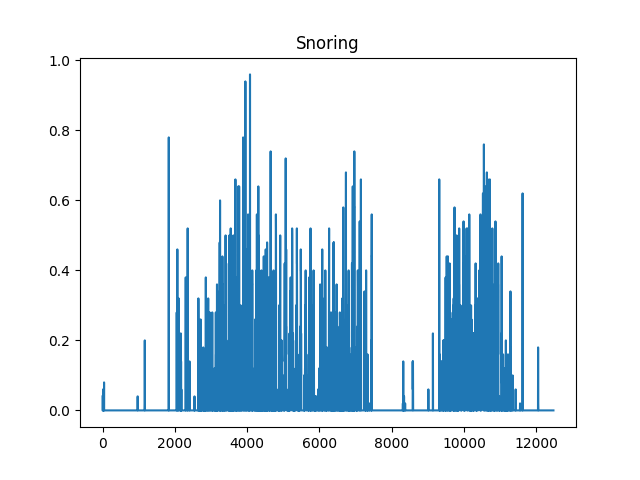

In [58]:
plt.figure(1)
snore = edf.readSignal(7)
plt.title('Snoring')
plt.plot(snore)
plt.show()

<IPython.core.display.Javascript object>


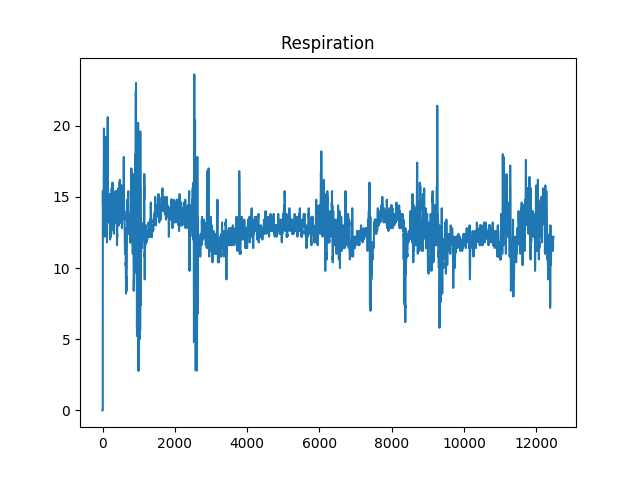

In [59]:
plt.figure(2)
resp = edf.readSignal(4)
plt.title('Respiration')
plt.plot(resp)
plt.show()

<IPython.core.display.Javascript object>


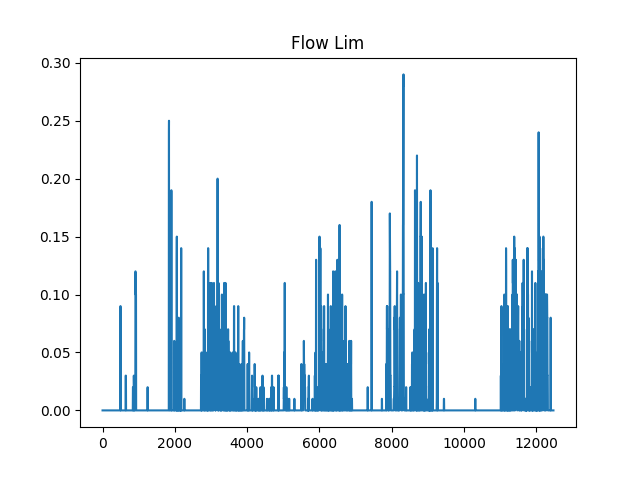

In [61]:
plt.figure(3)
flow = edf.readSignal(8)
plt.title('Flow Lim')
plt.plot(flow)
plt.show()

<IPython.core.display.Javascript object>


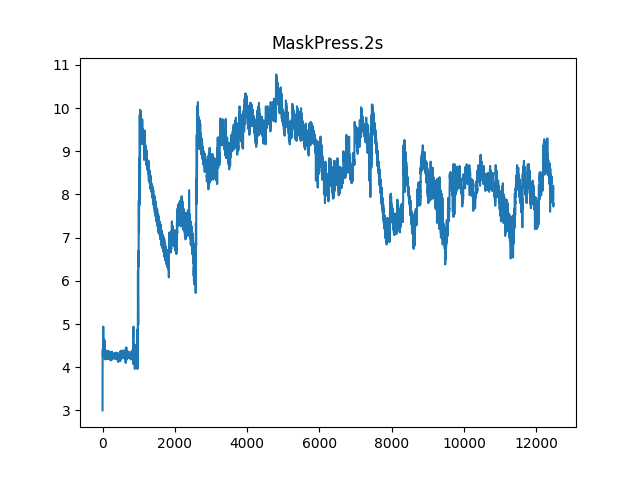

In [71]:
plt.figure(4)
snore = edf.readSignal(0)
plt.title(edf.getLabel(0))
plt.plot(snore)
plt.show()

<IPython.core.display.Javascript object>


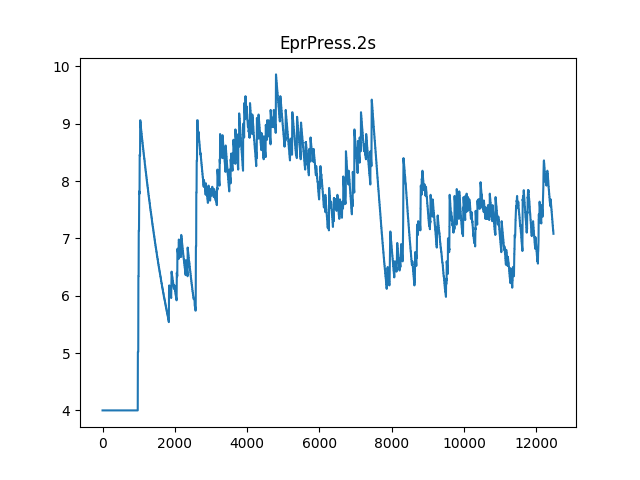

In [64]:
plt.figure(5)
snore = edf.readSignal(2)
plt.title(edf.getLabel(2))
plt.plot(snore)
plt.show()

<IPython.core.display.Javascript object>


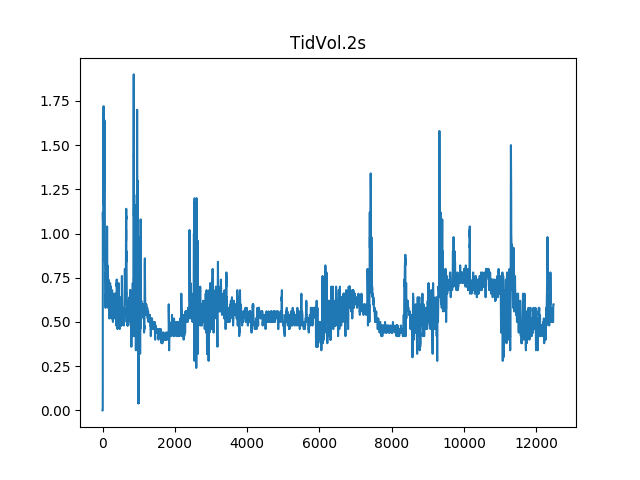

In [67]:
plt.figure(6)
snore = edf.readSignal(5)
plt.title(edf.getLabel(5))
plt.plot(snore)
plt.show()

<IPython.core.display.Javascript object>


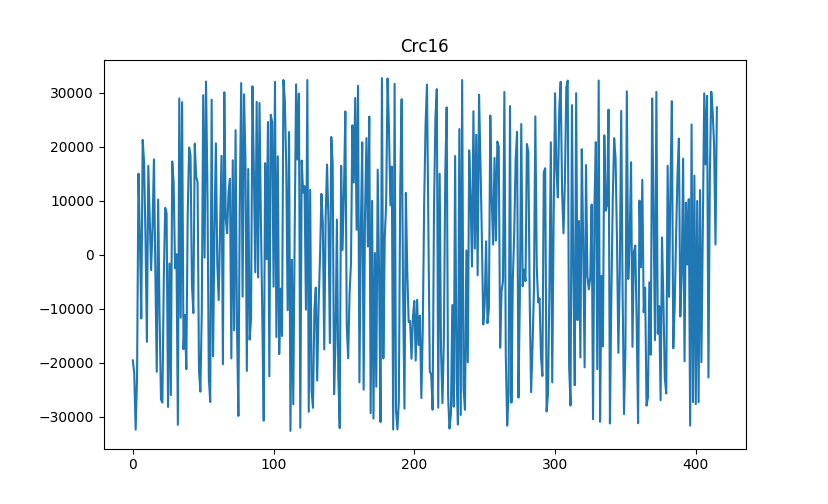

In [70]:
plt.figure(7)
snore = edf.readSignal(9)
plt.title(edf.getLabel(9))
plt.plot(snore)
plt.show()

In [72]:
time = lambda ch: [edf.getStartdatetime() + datetime.timedelta(seconds=2*x) for x in range(edf.getNSamples()[ch])]

In [16]:
def plotDat(ch=0):
    time = lambda ch: [edf.getStartdatetime() + datetime.timedelta(seconds=1*x) for x in range(edf.getNSamples()[ch])]
    fig = plt.figure()
    data = edf.readSignal(ch)
    plt.title(edf.getLabel(ch))
    plt.xlabel('Date/Time')
    plt.ylabel('{0} ({1})'.format(edf.getLabel(ch).split('.')[0], edf.getPhysicalDimension(ch)))
    plt.plot(time(ch), data)
    plt.show()
    fig.autofmt_xdate()

<IPython.core.display.Javascript object>


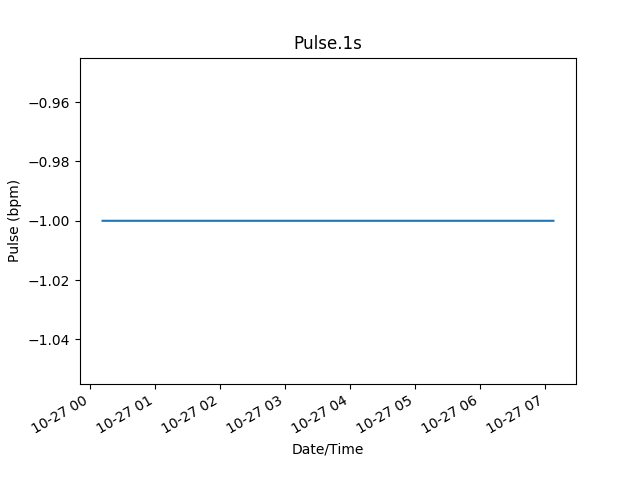

In [18]:
plotDat(0)

In [102]:
int(edf.getLabel(0).split('.')[1])

ValueError: invalid literal for int() with base 10: '40ms'